In [1]:
import matplotlib.pylab as plt
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
np.random.seed(42)

# Generating random values for x1, x2, and x3 where x3 is between -1 and 1
x1 = np.random.uniform(-1, 1, 1000)
x2 = np.random.uniform(-1, 1, 1000)
x3 = np.random.uniform(-1, 1, 1000)

# Generating random values for the error term e from a normal distribution
e = np.random.normal(0, 1, 1000)

# Calculate y based on the equation with x3 values above 0
condition = x3 > 0
y = 0.2 * x1 - 5 * x2 + np.where(condition, 10 * x2, 0) + e

# Reshape x2 for sklearn's input requirement
X = np.column_stack((x1, x2,x3))

# Initialize and fit the models
linear_model = LinearRegression()
linear_model.fit(X, y)

xgb_model = XGBRegressor()
xgb_model.fit(X, y)

svm_model = SVR(kernel='rbf')
svm_model.fit(X, y)

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

# Predict y values using the fitted models
y_pred_linear = linear_model.predict(X)
y_pred_xgb = xgb_model.predict(X)
y_pred_svm = svm_model.predict(X)
y_pred_rf = rf_model.predict(X)



<Figure size 2000x400 with 0 Axes>

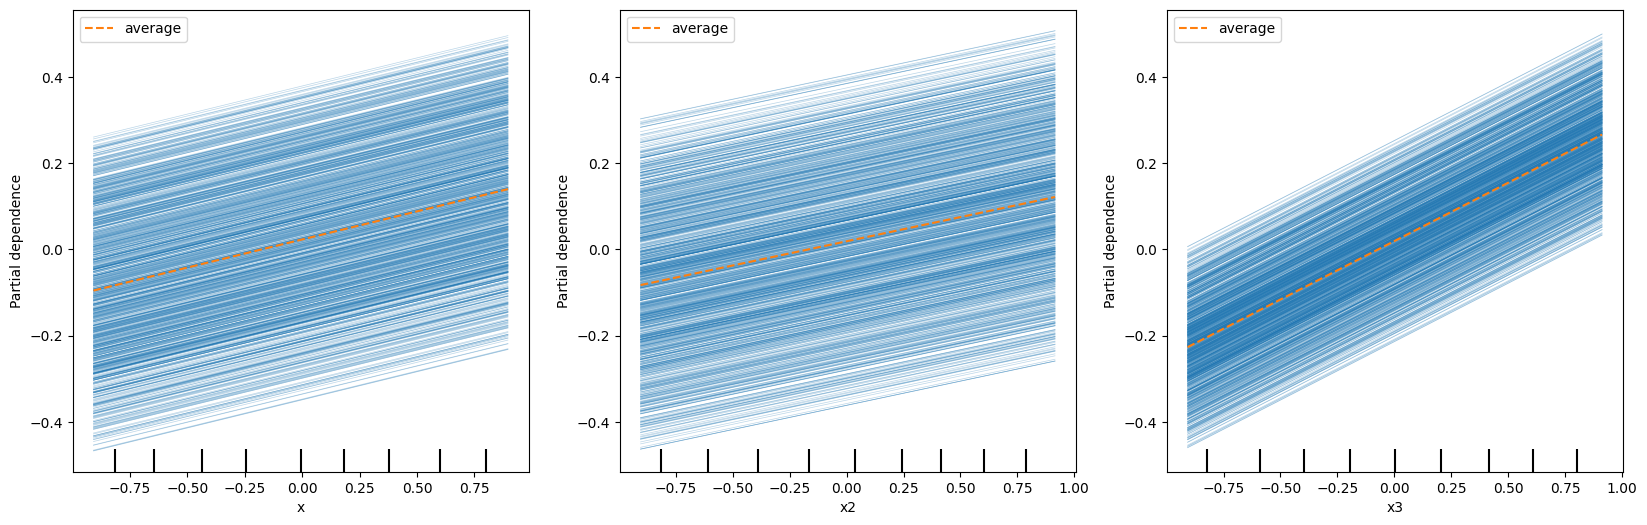

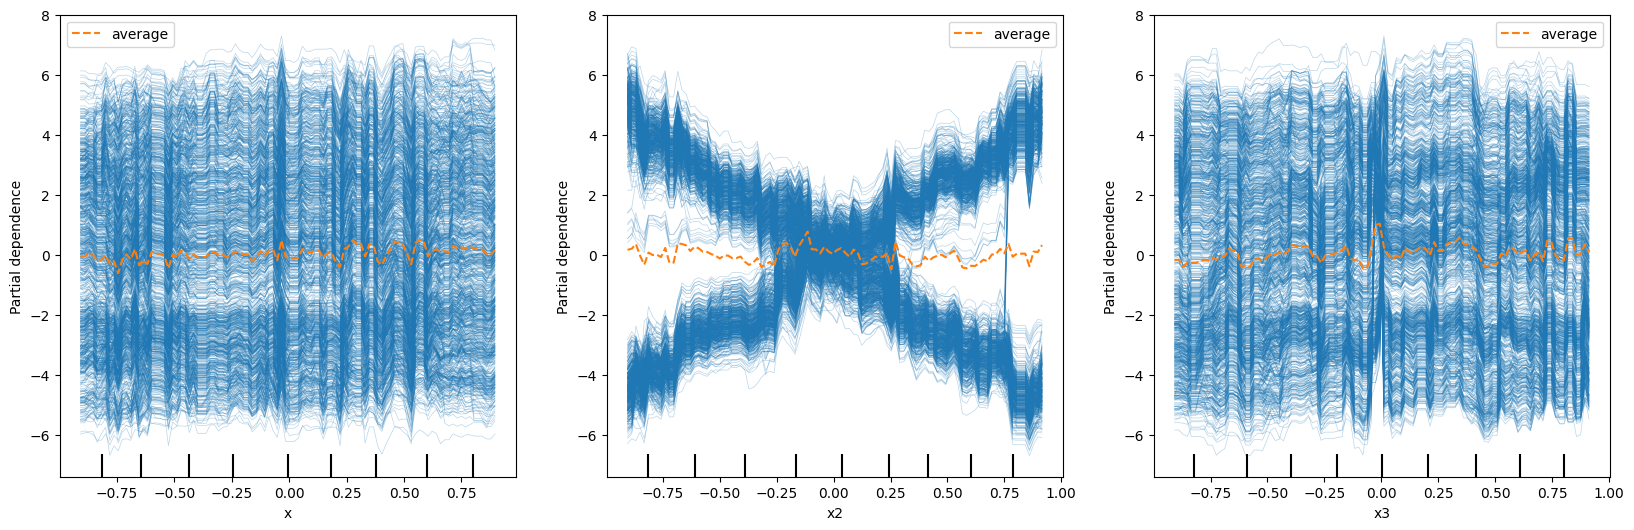

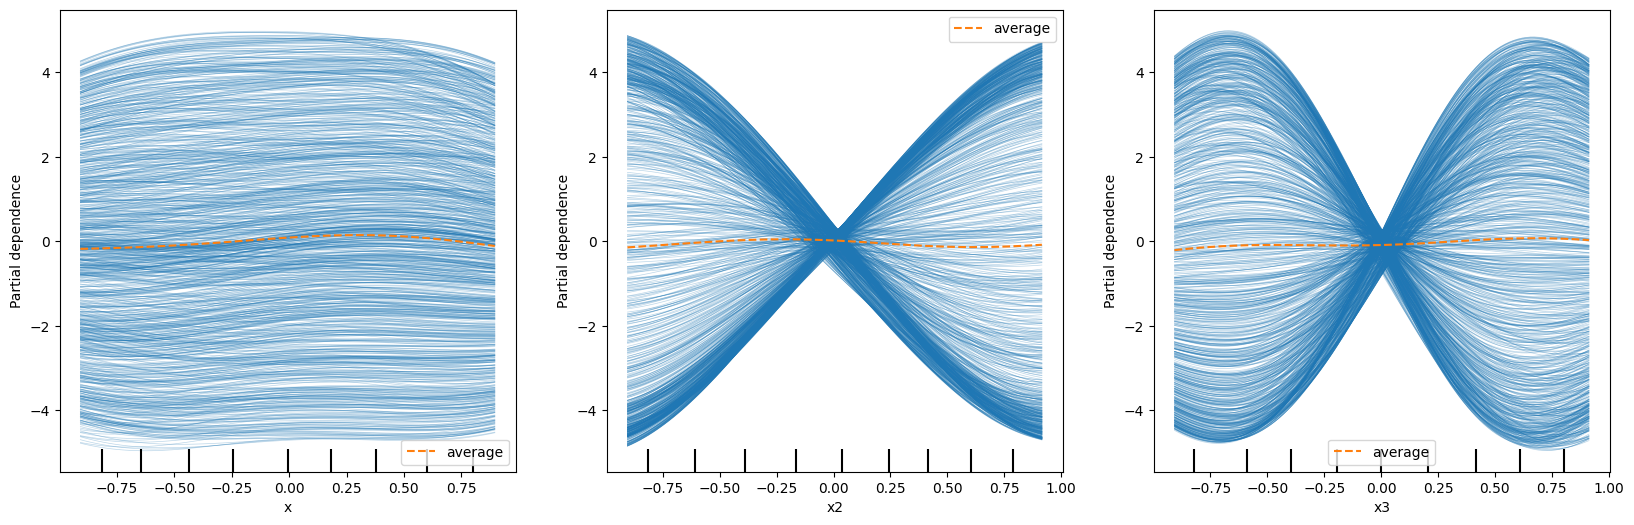

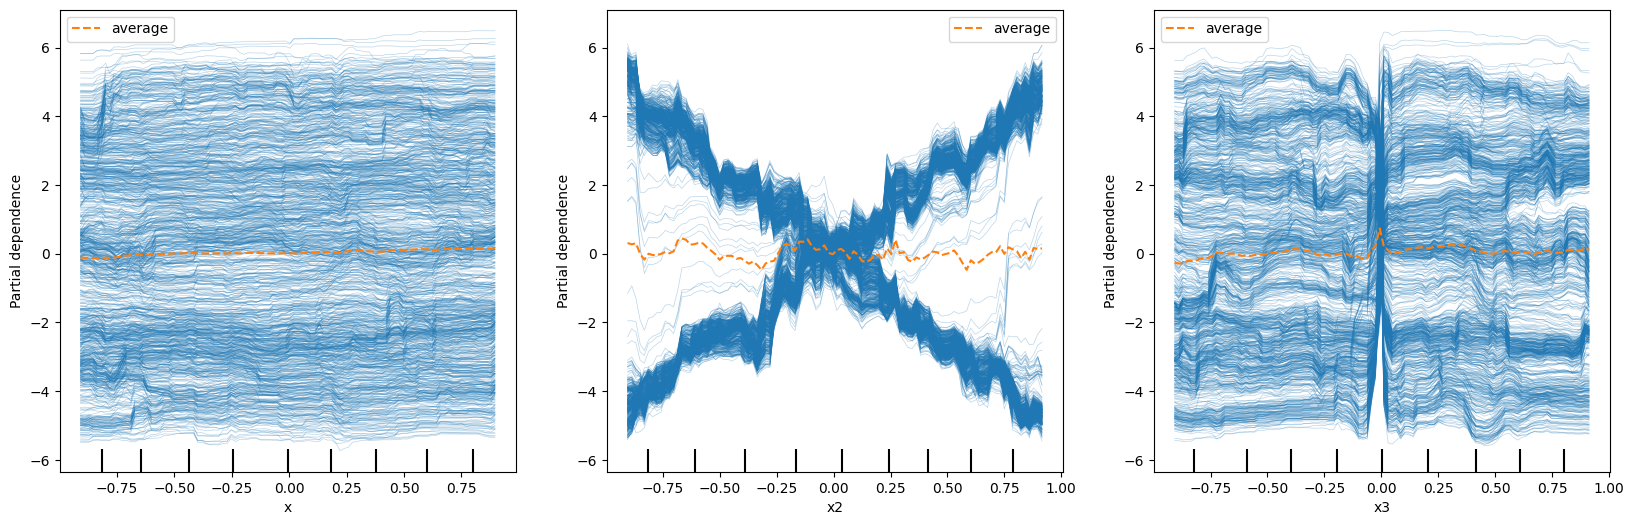

In [18]:
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig, (ax1, ax2,ax3) = plt.subplots(
    1, 3, figsize=(20, 6))  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(linear_model, X, features=[
                                               0, 1,2], feature_names=["x", "x2","x3"], ax=[ax1, ax2,ax3],kind='both')
fig, (ax1, ax2,ax3) = plt.subplots(
    1, 3, figsize=(20, 6))  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(xgb_model, X, features=[
                                               0, 1,2], feature_names=["x", "x2","x3"], ax=[ax1, ax2,ax3],kind='both')
fig, (ax1, ax2,ax3) = plt.subplots(
    1, 3, figsize=(20, 6))  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(svm_model, X, features=[
                                               0, 1,2], feature_names=["x", "x2","x3"], ax=[ax1, ax2,ax3],kind='both')
fig, (ax1, ax2,ax3) = plt.subplots(
    1, 3, figsize=(20, 6))  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(rf_model, X, features=[
                                               0, 1,2], feature_names=["x", "x2","x3"], ax=[ax1, ax2,ax3],kind='both')


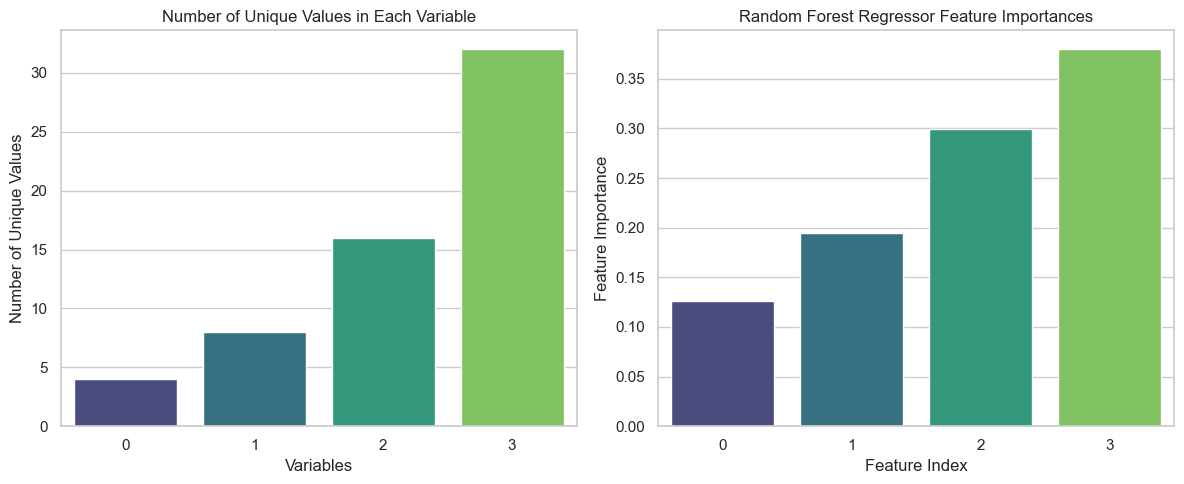

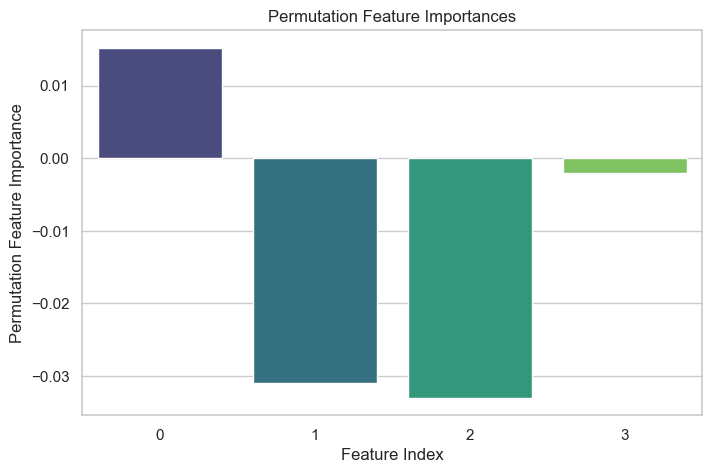

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Generate variables with varying numbers of unique values
num_unique_vals = [4, 8, 16, 32]
variables = []

for num in num_unique_vals:
    # Generate unique values within the specified range
    values = np.random.randint(num, size=1000)
    np.random.shuffle(values)
    variables.append(values)

# Convert the variables list to a NumPy array and transpose it
X = np.array(variables).T

# Create a RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
y = np.random.randint(2, size=1000)

# Fit the classifier model
rf_classifier.fit(X_train, y_train) 

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Calculate permutation feature importances
result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=20, random_state=42)
pfi = result.importances_mean

# Set seaborn style
sns.set(style="whitegrid")

# Plot the number of unique values for each variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(len(num_unique_vals)), y=num_unique_vals, palette="viridis")
plt.xlabel('Variables')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Variable')

# Plot feature importances
plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(len(feature_importances)), y=feature_importances, palette="viridis")
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Random Forest Regressor Feature Importances')

plt.tight_layout()
plt.show()

# Plot permutation feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(len(pfi)), y=pfi, palette="viridis")
plt.xlabel('Feature Index')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importances')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Function to generate correlated data with target as sum of variables plus noise
def generate_correlated_data(n_samples, correlation):
    means = [0, 0, 0]
    cov_matrix = [
        [1.0, correlation, correlation],
        [correlation, 1.0, correlation],
        [correlation, correlation, 1.0]
    ]
    data = np.random.multivariate_normal(means, cov_matrix, n_samples)
    noise = np.random.normal(0, 0.1, n_samples)  # Adding noise
    data_with_noise = np.column_stack([data,np.random.normal(0, 1, n_samples), np.sum(data, axis=1) + noise])
    return data_with_noise

# Rest of your code remains the same

# Perform permutation feature importance for different correlations
correlation_levels = [0, 0.1,0.2,0.4,0.8,0.9]
num_features = 3
num_samples = 1000
num_iterations = 100

# Store feature importances for different correlation levels
feature_importances = {correlation: [] for correlation in correlation_levels}

for correlation in correlation_levels:
    print(f"Correlation: {correlation}")
    for _ in range(num_iterations):
        # Generate correlated data with target as sum of variables plus noise
        data = generate_correlated_data(num_samples, correlation)
        X = data[:, :-1]  # Features
        y = data[:, -1]   # Target

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a Random Forest model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Perform permutation feature importance on the test set
        perm_importance = permutation_importance(model, X_test, y_test, random_state=42,n_jobs=-1)
        feature_importances[correlation].append(perm_importance.importances_mean)




Correlation: 0


KeyboardInterrupt: 

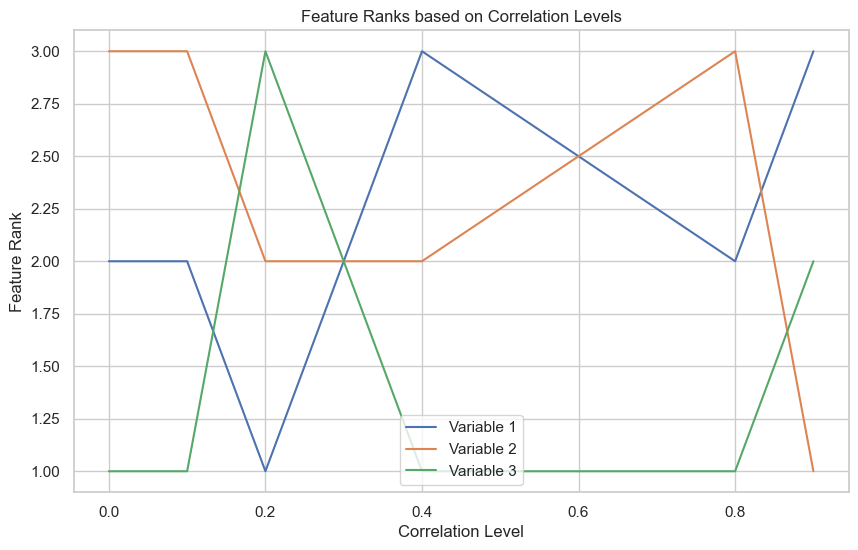

In [27]:
# Calculate average feature importance ranks for each correlation level
feature_ranks = {correlation: [] for correlation in correlation_levels}

for correlation, importance_values in feature_importances.items():
    avg_importances = np.mean(importance_values, axis=0)
    feature_ranks[correlation] = np.argsort(avg_importances)[::-1] + 1  # Add 1 to start ranks from 1

# Plotting feature ranks based on correlation levels
plt.figure(figsize=(10, 6))
for feature_index in range(num_features):
    ranks = [feature_ranks[correlation][feature_index] for correlation in correlation_levels]
    plt.plot(correlation_levels, ranks, label=f"Variable {feature_index + 1}")

plt.xlabel('Correlation Level')
plt.ylabel('Feature Rank')
plt.title('Feature Ranks based on Correlation Levels')
plt.legend()
plt.show()

In [1]:
# Plot boxplots for feature importances
plt.figure(figsize=(10, 6))

for correlation, importances in feature_importances.items():
    plt.boxplot(importances, positions=[correlation], widths=0.05)

plt.xlabel('Correlation Level')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for Different Correlation Levels')
plt.xticks(ticks=correlation_levels)
plt.grid(axis='y')
plt.show()


NameError: name 'plt' is not defined

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Define the number of samples
num_samples = 1000

# Generate random values for x1, x2, x3, x4 from normal distributions
x1 = np.random.normal(0, 1, num_samples)
x2 = np.random.normal(0, 1, num_samples)
x3 = np.random.normal(0, 1, num_samples)
x4 = np.random.normal(0, 1, num_samples)

# Generate random noise
noise = np.random.normal(0, 0.5, num_samples)

# Calculate y using the given equation y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise
y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'y': y
})

# Split the data into train and test sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


[-0.1955019  -1.65152164 -0.54088803  0.11508743  2.87710858 -1.65430446
  0.68299412 -2.1314832  -1.12875206  1.04849223]


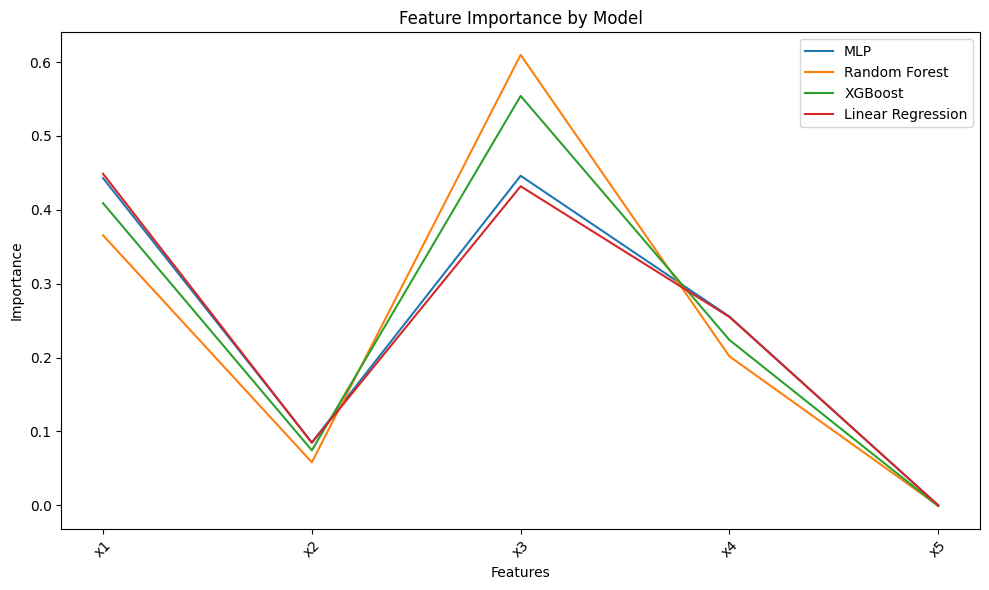

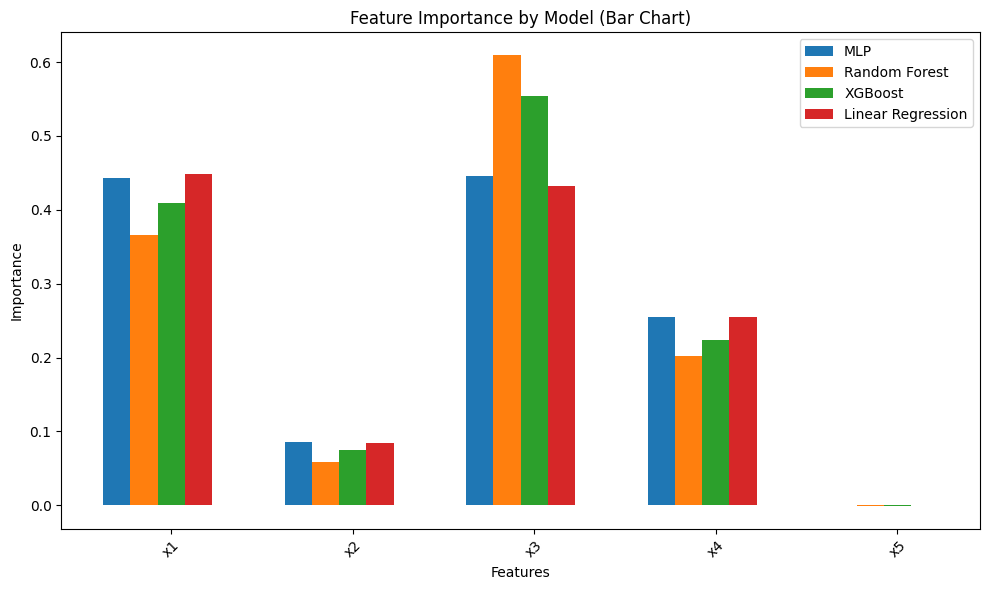

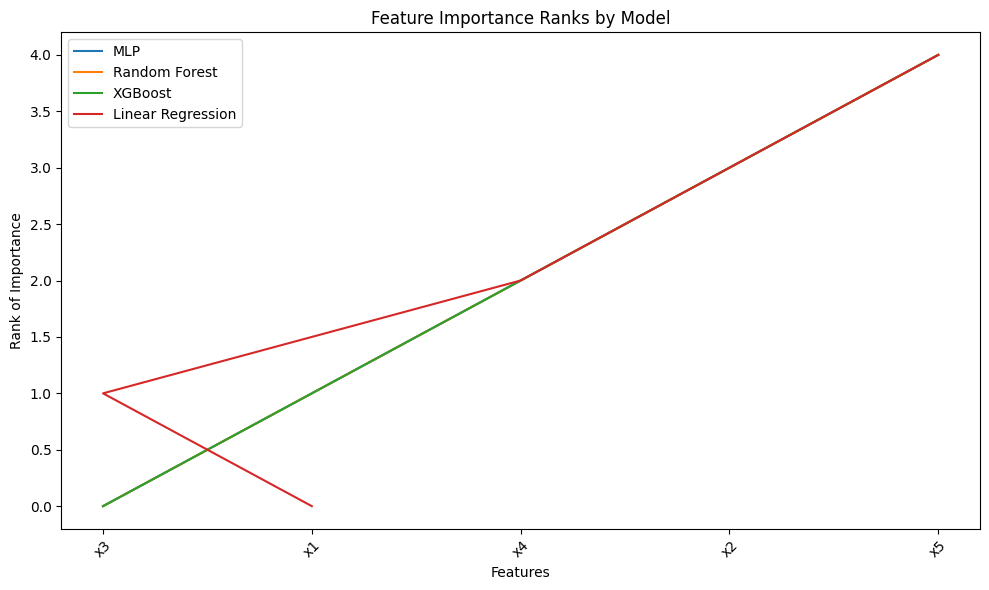

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Define the number of samples
num_samples = 1000

# Generate random values for x2, x4 from normal distributions
x2 = np.random.normal(0, 1, num_samples)
x4 = np.random.normal(0, 1, num_samples)

# Generate random noise
noise = np.random.normal(0, 0.5, num_samples)

# Generate x1 and x3 with correlation
mean = [0, 0]
covariance = [
    [1, 0.9],  # Variance and covariance between x1 and x3
    [0.9, 1]   # Variance of x3
]

x1_x3 = np.random.multivariate_normal(mean, covariance, num_samples)
x1 = x1_x3[:, 0]
x3 = x1_x3[:, 1]

# Calculate y using the given equation y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise
y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'y': y
})

# Split the data into train and test sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Initialize the models
mlp = MLPRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
linear_reg = LinearRegression()

# Fit the models
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Define the number of samples
num_samples = 1000

# Generate random values for x2, x4 from normal distributions
x2 = np.random.normal(0, 1, num_samples)
x4 = np.random.normal(0, 1, num_samples)
x5 = np.random.normal(0, 1, num_samples)


# Generate random noise
noise = np.random.normal(0, 0.5, num_samples)

# Generate x1 and x3 with correlation
mean = [0, 0]
covariance = [
    [1, 0.9],  # Variance and covariance between x1 and x3
    [0.9, 1]   # Variance of x3
]

x1_x3 = np.random.multivariate_normal(mean, covariance, num_samples)
x1 = x1_x3[:, 0]
x3 = x1_x3[:, 1]

# Calculate y using the given equation y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise
y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'x5': x5,
    'y': y
})

# Split the data into train and test sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Initialize the models
mlp = MLPRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
linear_reg = LinearRegression()
# Fit the models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Define the number of samples
num_samples = 1000

# Generate random values for x2, x4 from normal distributions
x2 = np.random.normal(0, 1, num_samples)
x4 = np.random.normal(0, 1, num_samples)
x5 = np.random.normal(0, 1, num_samples)

# Generate random noise
noise = np.random.normal(0, 0.1, num_samples)

# Generate x1 and x3 with correlation
mean = [0, 0]
covariance = [
    [1, 0.91],  # Variance and covariance between x1 and x3
    [0.91, 1]   # Variance of x3
]

x1_x3 = np.random.multivariate_normal(mean, covariance, num_samples)
x1 = x1_x3[:, 0]
x3 = x1_x3[:, 1]

# Calculate y using the given equation y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise
y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,    
    'x5': x5,    
    'y': y
})

# Split the data into train and test sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Initialize the models
mlp = MLPRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
linear_reg = LinearRegression()
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)
models = [mlp, rf, xgb, linear_reg]
model_names = ['MLP', 'Random Forest', 'XGBoost', 'Linear Regression']

plt.figure(figsize=(10, 6))

feature_importances = []

for model, name in zip(models, model_names):
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]
    feature_importances.append(perm_importance.importances_mean)
    plt.plot(np.arange(len(X_test.columns)), perm_importance.importances_mean, label=name)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance by Model')
plt.legend()
plt.xticks(np.arange(len(X_test.columns)), X_test.columns, rotation=45)
plt.tight_layout()
plt.show()

# Plotting bar chart for feature importances by models
plt.figure(figsize=(10, 6))

for idx, (name, importance) in enumerate(zip(model_names, feature_importances)):
    plt.bar(np.arange(len(importance)) + 0.15 * idx, importance, width=0.15, label=name)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance by Model (Bar Chart)')
plt.xticks(np.arange(len(X_test.columns)) + 0.3, X_test.columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

models = [mlp, rf, xgb, linear_reg]
model_names = ['MLP', 'Random Forest', 'XGBoost', 'Linear Regression']

plt.figure(figsize=(10, 6))

for model, name in zip(models, model_names):
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]
    plt.plot(X_test.columns[sorted_idx], np.arange(len(X_test.columns)), label=name)

plt.xlabel('Features')
plt.ylabel('Rank of Importance')
plt.title('Feature Importance Ranks by Model')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



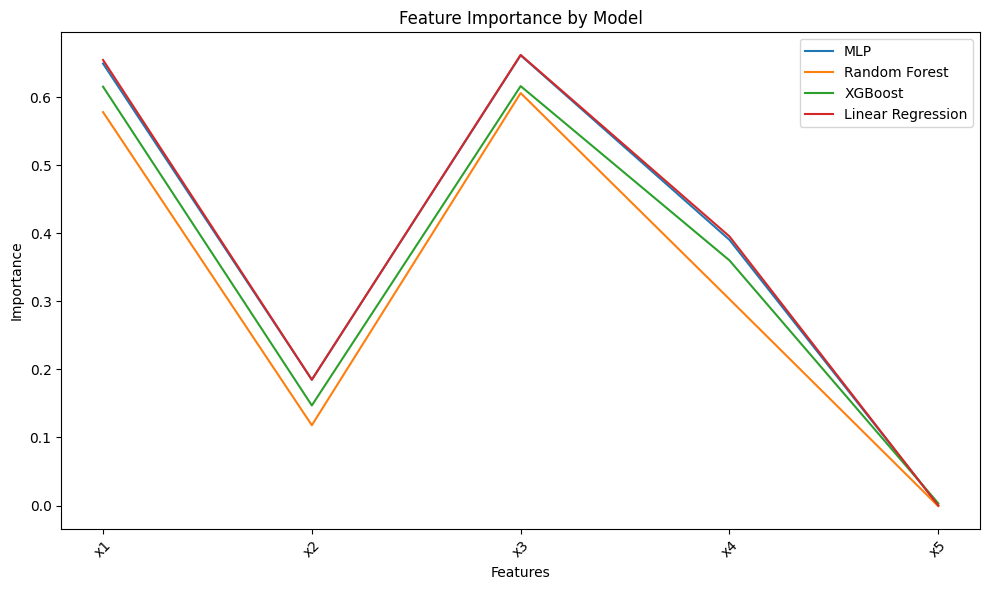

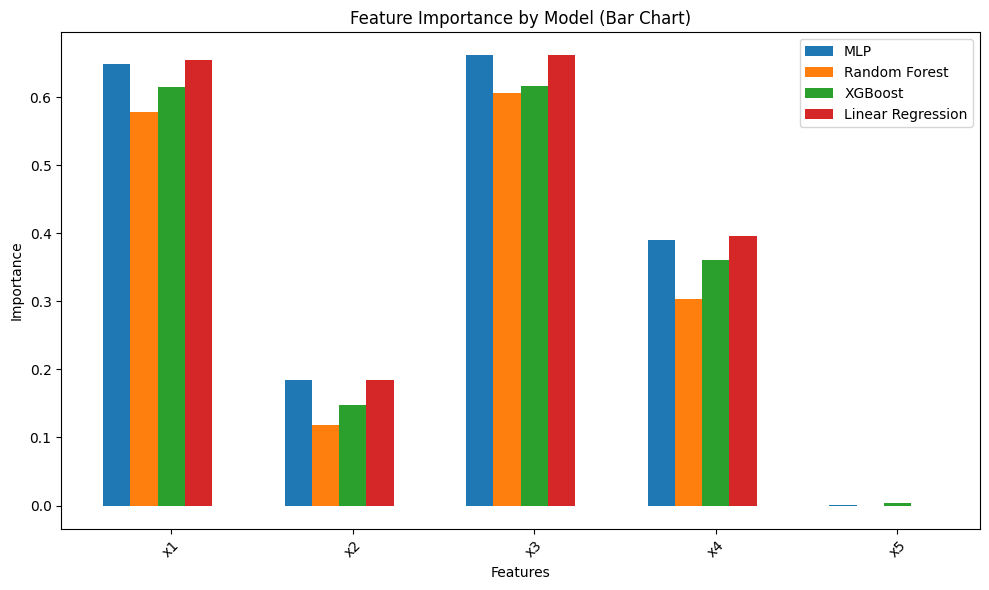

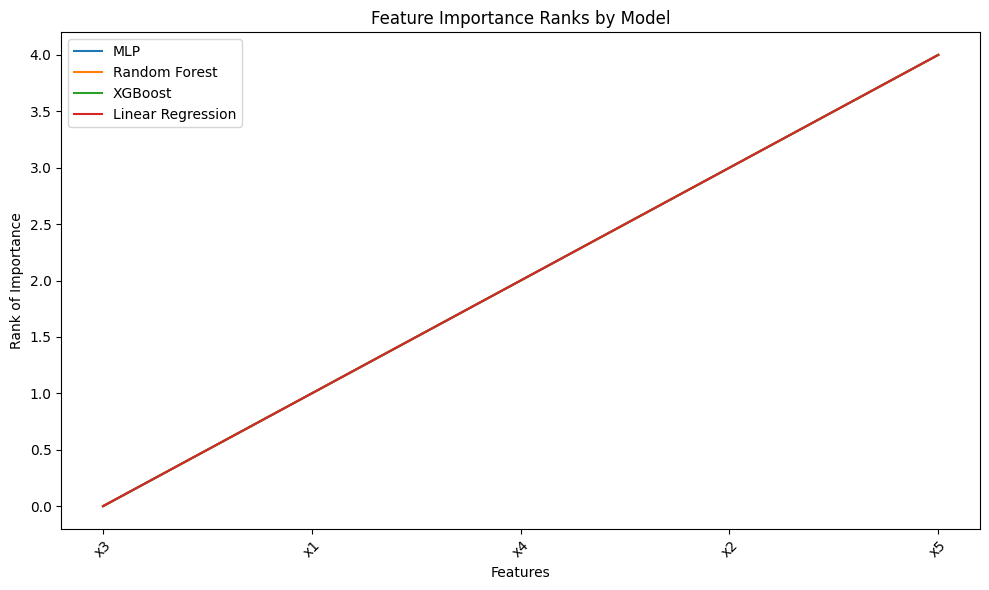

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Define the number of samples
num_samples = 1000

# Generate random values for x2, x4 from normal distributions
x2 = np.random.normal(0, 1, num_samples)
x4 = np.random.normal(0, 1, num_samples)

# Generate random noise
noise = np.random.normal(0, 0.5, num_samples)

# Generate x1 and x3 with correlation
mean = [0, 0]
covariance = [
    [1, 0.9],  # Variance and covariance between x1 and x3
    [0.9, 1]   # Variance of x3
]

x1_x3 = np.random.multivariate_normal(mean, covariance, num_samples)
x1 = x1_x3[:, 0]
x3 = x1_x3[:, 1]

# Calculate y using the given equation y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise
y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'y': y
})

# Split the data into train and test sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Initialize the models
mlp = MLPRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
linear_reg = LinearRegression()

# Fit the models
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Define the number of samples
num_samples = 1000

# Generate random values for x2, x4 from normal distributions
x2 = np.random.normal(0, 1, num_samples)
x4 = np.random.normal(0, 1, num_samples)
x5 = np.random.normal(0, 1, num_samples)


# Generate random noise
noise = np.random.normal(0, 0.5, num_samples)

# Generate x1 and x3 with correlation
mean = [0, 0]
covariance = [
    [1, 0.9],  # Variance and covariance between x1 and x3
    [0.9, 1]   # Variance of x3
]

x1_x3 = np.random.multivariate_normal(mean, covariance, num_samples)
x1 = x1_x3[:, 0]
x3 = x1_x3[:, 1]

# Calculate y using the given equation y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise
y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'x5': x5,
    'y': y
})

# Split the data into train and test sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Initialize the models
mlp = MLPRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
linear_reg = LinearRegression()
# Fit the models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Define the number of samples
num_samples = 1000

# Generate random values for x2, x4 from normal distributions
x2 = np.random.normal(0, 1, num_samples)
x4 = np.random.normal(0, 1, num_samples)
x5 = np.random.normal(0, 1, num_samples)


# Generate random noise
noise = np.random.normal(0, 0.1, num_samples)

x1 = np.random.normal(0, 1, num_samples)
x3 = np.random.normal(0, 1, num_samples)

# Calculate y using the given equation y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise
y = x1 + x2 * 0.5 + x3 + x4 * 0.8 + noise

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4, 
    'x5': x5,    
       
    'y': y
})

# Split the data into train and test sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Initialize the models
mlp = MLPRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
linear_reg = LinearRegression()
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)
models = [mlp, rf, xgb, linear_reg]
model_names = ['MLP', 'Random Forest', 'XGBoost', 'Linear Regression']

plt.figure(figsize=(10, 6))

feature_importances = []

for model, name in zip(models, model_names):
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]
    feature_importances.append(perm_importance.importances_mean)
    plt.plot(np.arange(len(X_test.columns)), perm_importance.importances_mean, label=name)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance by Model')
plt.legend()
plt.xticks(np.arange(len(X_test.columns)), X_test.columns, rotation=45)
plt.tight_layout()
plt.show()

# Plotting bar chart for feature importances by models
plt.figure(figsize=(10, 6))

for idx, (name, importance) in enumerate(zip(model_names, feature_importances)):
    plt.bar(np.arange(len(importance)) + 0.15 * idx, importance, width=0.15, label=name)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance by Model (Bar Chart)')
plt.xticks(np.arange(len(X_test.columns)) + 0.3, X_test.columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

models = [mlp, rf, xgb, linear_reg]
model_names = ['MLP', 'Random Forest', 'XGBoost', 'Linear Regression']

plt.figure(figsize=(10, 6))

for model, name in zip(models, model_names):
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]
    plt.plot(X_test.columns[sorted_idx], np.arange(len(X_test.columns)), label=name)

plt.xlabel('Features')
plt.ylabel('Rank of Importance')
plt.title('Feature Importance Ranks by Model')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

